# Exercise 3a: Grouping

## Aim: Work with data which has been grouped.

Find the teaching resources here: https://tutorial.xarray.dev/fundamentals/03.2_groupby_with_xarray.html

### Issues Covered:
- Grouping data with `.groupby()`
- Finding the mean of grouped data.

## GroupBy processing

Our ocean model dataset has no time dimension, so for this exercise we are going to use the NOAA ERSSST dataset from the tutorial. Load it using the command below.

In [1]:
import xarray as xr
ds = xr.tutorial.load_dataset("ersstv5")

Have a quick explore of the dataset and see what it contains.

In [2]:
ds

<xarray.Dataset> Size: 40MB
Dimensions:    (lat: 89, lon: 180, time: 624, nbnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 10kB 9.969e+36 9.969e+36 ... 9.969e+36
    sst        (time, lat, lon) float32 40MB -1.8 -1.8 -1.8 -1.8 ... nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-06-07

Q1. First, lets group our dataset by year.

In [3]:
grouped = ds.groupby("time.year")

Q2. Lets take the mean of each group, to give the annual mean.

In [4]:
annual_means = grouped.mean()

Q3. To see what we've done, lets plot the mean for the year 1960.

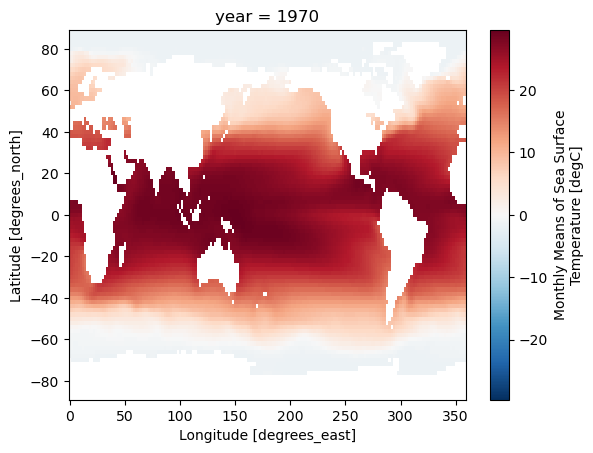

In [5]:
annual_means.sel(year=1970).sst.plot()

Q4. Next, lets plot an annual mean time seties for the point in the Atlantic ocean latitude=-50.625, longitude=0.

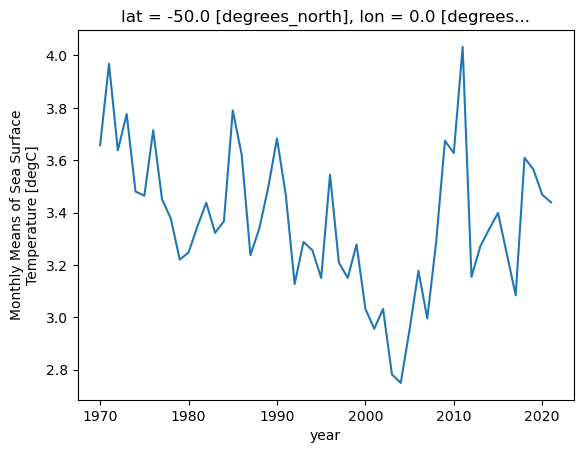

In [6]:
annual_means.sel(lat=-50.625, lon=0, method="nearest").sst.plot()